# Lab 17 - Normal distributions.

The normal distribution is also known as the bell curve or the Gaussian distribution.  We will look at several of its properties in this lab.

First, let's import the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

There is a function in `numpy` for sampling from the normal distribution, which has the form:
`np.random.normal(loc=0.0, scale=1.0, size=None)`

This function has three optional parameters:
- `loc` (short for location) is the mean of the distribution and where it will be centered.  The default value is 0.
- `scale` is the standard deviation or spread of the distribution, and controls how wide the distribution will be.  The default value is 1.
- `size` is the number of samples to take, and the default is 1.

For example, `np.random.normal(loc = -5.4, scale = 2.8, size = 10)` will simulate 10 samples from a normal distribution with mean -5.4 and standard deviation 2.8.  Try it below.

In [2]:
np.random.normal(loc = -5.4, scale = 2.8, size = 10)

array([-9.09703614, -7.1656774 , -6.80426429, -3.40436585, -7.30940749,
       -7.40149795, -6.91048796, -1.08972347, -5.4119528 , -5.21158564])

Can you take 5 samples from a normal distribution with a mean of 2.5 and standard deviation of 0.4?

In [3]:
np.random.normal(loc = 2.5, scale = 0.4, size = 5)

array([2.53925339, 2.48495964, 1.74946534, 2.77698518, 2.65774187])

Now, let's take 10,000 samples from the *standard normal distribution*, which has mean 0 and standard deviation 1 and save the array of samples as a variable.

In [5]:
sample = np.random.normal(size =10000)

<details> <summary>Answer</summary>
<code>
sample = np.random.normal(size =10000)
</code>
</details>

Display your variable to make sure your code worked correctly:

In [6]:
sample

array([-0.22134291,  0.34226397,  0.17328023, ...,  0.08187373,
       -0.10874316,  0.22013595])

To visualize this sample, let's plot it as a histogram.  Remember to convert the numpy array into a pandas Series first.

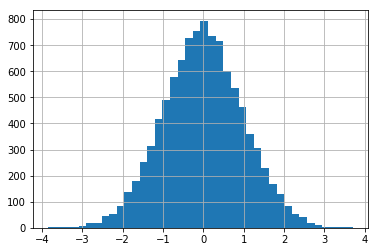

In [7]:
pd.Series(sample).hist(bins = 40)

<details> <summary>Answer</summary>
<code>
pd.Series(sample).hist(bins = 40)</code>
</details>

Can you change the y axis to show the density instead of the frequency?

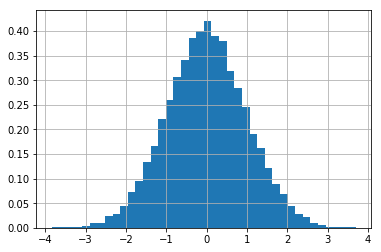

In [8]:
pd.Series(sample).hist(bins = 40, density = True)

<details> <summary>Answer</summary>
<code>
pd.Series(sample).hist(bins = 40, density = True)</code>
</details>

How does this compare to the standard normal distribution (second graph on [this page](https://www.inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html))?

What's the probability that a number sampled from the standard normal distribution is in between -1 and 1?  We can estimate this probability from our sample by counting the number of values between -1 and 1, and dividing by the size of our sample.

#### Step 1: Count the number of samples between -1 and 1

You can use filters with a numpy array the same way as with a pandas Series (or you can convert the numpy array into a pandas Series first).  `.shape` and `.sum()` will also work with numpy arrays. 

In [9]:
geq_1_filter = sample >= -1
leq_1_filter = sample <= 1

(geq_1_filter & leq_1_filter).sum()

6873

<details> <summary>Answer</summary>
<code>
geq_1_filter = sample >= -1
leq_1_filter = sample <= 1
(geq_1_filter & leq_1_filter).sum()</code>
<br>
or
<br>
<code>
geq_1_filter = sample >= -1
leq_1_filter = sample <= 1
sample[geq_1_filter & leq_1_filter].shape</code>
</details>

#### Step 2: Calculating the probability
Now compute the probability that a sample is between -1 and 1.

In [11]:
6875/10000

0.6875

Does this calculated probability correspond with the theory?

### Comparing two normal distributions

We'll now compare two normal distributions with different means and variances.  One of the distributions will be the standard normal distribution that we previously sampled.

Take a sample of size 10,000 from the normal distribution with mean = 1 and standard deviation = 2.5.

In [12]:
sample2 = np.random.normal(loc = 1, scale = 2.5, size = 10000)
sample2

array([ 4.73301558, -2.76427954,  0.40196409, ...,  0.50230638,
        5.40603695,  1.79851919])

Plot the histogram of each sample on the same graph below.  Remember to make the histograms transparent using the `alpha` parameter.

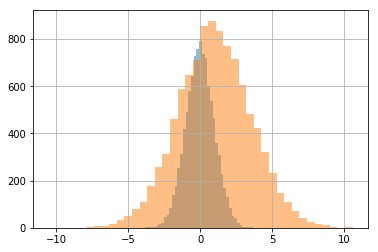

In [13]:
pd.Series(sample).hist(bins = 40,alpha = 0.5)
pd.Series(sample2).hist(bins = 40,alpha = 0.5)

Now normalize each graph by adding the parameter `density = True`:

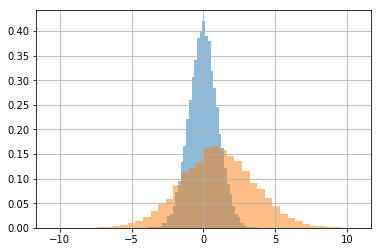

In [14]:
pd.Series(sample).hist(bins = 40,alpha = 0.5,density = True)
pd.Series(sample2).hist(bins = 40,alpha = 0.5,density = True)

How did the histograms change?  

Let's compute the probabilty that samples from the second normal distribution are within one standard deviation of the mean.  Since the mean was 1 and the standard deviation was 2.5, we want the probabily that samples are between 1 - 2.5 = -1.5 and 1 + 2.5 = 3.5

In [15]:
geq_filter = sample2 >= -1.5
leq_filter = sample2 <= 3.5
(geq_filter & leq_filter).sum()

6840

In [17]:
6840/10000

0.684

How does this compare with the probabiliy that a value from the first sample (standard normal distribution) is in between -1 and 1?

### Z-Score

We can compute the *z-score* of a sample (from any normal distribution) by subtracting the mean of the sample and dividing by the standard deviation.

Compute the mean and standard deviation of your second sample and save them as the variables `mean2` and `sd2`.

In [19]:
mean2 = sample2.mean()
sd2 = sample2.std()

<details> <summary>Pattern:</summary>
<code>
variable_name = sample_variable_name.mean()</code>
</details>

We can compute the z-scores of all of sample two with the code `(sample2 - mean2)/sd2`.  Try it below

In [20]:
z2 = (sample2 - mean2)/sd2

Save the z-scores in a new variable, and plot them as a histogram.

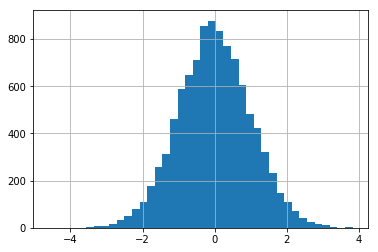

In [21]:
pd.Series(z2).hist(bins = 40)

What happened?

### Challenges:
- What's the probability that a sample from the standard normal distribution is between -2 and 2?
- Plot overlapping histograms to compare samples from the standard normal distribution with the normal distriubtion wtih mean = -1 and standard deviation 0.5.
- What's the probability that samples from the normal distriubtion with mean = -1 and standard deviation 0.5 are within 2 standard deviations of the mean?